In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(69)

# Generate synthetic revenue data
control = np.random.normal(loc=50, scale=10, size=100)   
treatment = np.random.normal(loc=54, scale=10, size=100) 

# Combine into a DataFrame
df = pd.DataFrame({
    'group': ['control'] * 100 + ['treatment'] * 100,
    'revenue': np.concatenate([control, treatment])
})

# Preview data
df.sample(10)


,group,revenue
120,treatment,34.266081
39,control,48.097669
131,treatment,49.290140
31,control,65.917631
17,control,30.528767
71,control,48.421235
152,treatment,51.104032
14,control,36.711592
128,treatment,61.919157
7,control,60.562991


In [16]:
# Split into groups
control_rev = df[df['group'] == 'control']['revenue']
treatment_rev = df[df['group'] == 'treatment']['revenue']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(treatment_rev, control_rev, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.5f}")

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("The difference is statistically significant — the new feature increased revenue!")
else:
    print("The difference is not statistically significant — no evidence the feature changed revenue.")



T-statistic: 2.66
P-value: 0.00854
The difference is statistically significant — the new feature increased revenue!


| Concept                           | Explanation                                                         |
| --------------------------------- | ------------------------------------------------------------------- |
| **Null Hypothesis (H₀)**          | The new feature does **not** change revenue.                        |
| **Alternative Hypothesis (H₁)**   | The new feature **does** change revenue.                            |
| **t-statistic**                   | Measures how many standard errors apart the group means are.        |
| **p-value**                       | Probability of seeing this difference (or larger) if H₀ were true.  |
| **Significance level (α = 0.05)** | If `p < 0.05`, we reject H₀ and conclude the feature had an effect. |


In [17]:
# Calculate group averages
control_mean = control_rev.mean()
treatment_mean = treatment_rev.mean()

# Calculate the difference and percent increase
absolute_increase = treatment_mean - control_mean
percent_increase = (absolute_increase / control_mean) * 100

print(f"Average Revenue (Control): ${control_mean:.2f}")
print(f"Average Revenue (Treatment): ${treatment_mean:.2f}")
print(f"Absolute Increase: ${absolute_increase:.2f}")
print(f"Percent Increase: {percent_increase:.1f}%")

# Simple interpretation
print("\n--- Interpretation ---")
if percent_increase > 0:
    print(f"The new feature increased average revenue by {percent_increase:.1f}% per user.")
else:
    print(f"The new feature decreased average revenue by {abs(percent_increase):.1f}% per user.")


Average Revenue (Control): $49.62
Average Revenue (Treatment): $53.72
Absolute Increase: $4.11
Percent Increase: 8.3%

--- Interpretation ---
The new feature increased average revenue by 8.3% per user.


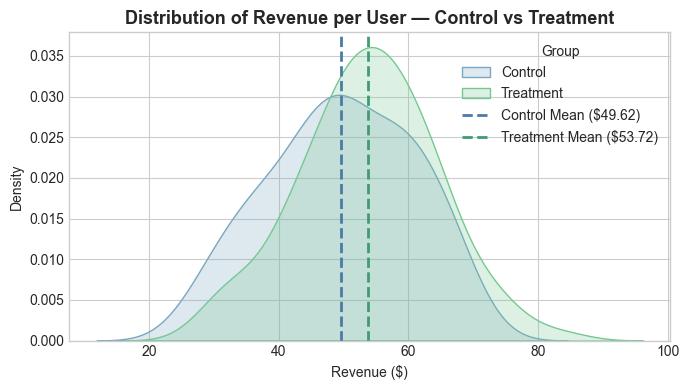

In [18]:

# Calculate means
control_mean = np.mean(control_rev)
treat_mean = np.mean(treatment_rev)

# Plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7,4))

# Density plots for each group
sns.kdeplot(control_rev, fill=True, label='Control', color='#7aa6c2')
sns.kdeplot(treatment_rev, fill=True, label='Treatment', color='#76c893')

# Vertical mean lines
plt.axvline(control_mean, color='#4a7ba7', linestyle='--', linewidth=2, label=f'Control Mean (${control_mean:.2f})')
plt.axvline(treat_mean, color='#3e9c73', linestyle='--', linewidth=2, label=f'Treatment Mean (${treat_mean:.2f})')

# Titles and labels
plt.title('Distribution of Revenue per User — Control vs Treatment', fontsize=13, weight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Density')
plt.legend(title='Group', fontsize=10)
plt.tight_layout()
plt.show()


# SKIP IN CLASS.  
_EXTRAS ON CONFIDENCE INTERVALS_

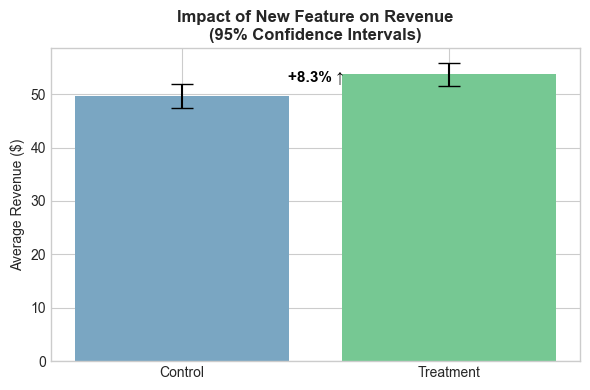

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate means and 95% confidence intervals
def mean_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)
    margin = sem * stats.t.ppf((1 + confidence) / 2, len(data)-1)
    return mean, mean - margin, mean + margin

control_mean, c_low, c_high = mean_ci(control_rev)
treat_mean, t_low, t_high = mean_ci(treatment_rev)

means = [control_mean, treat_mean]
errors = [control_mean - c_low, treat_mean - t_low]

# Plot — minimalist and clear
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6,4))

bars = ax.bar(['Control', 'Treatment'], means, yerr=errors, capsize=8, color=['#7aa6c2','#76c893'])
ax.set_ylabel('Average Revenue ($)')
ax.set_title('Impact of New Feature on Revenue\n(95% Confidence Intervals)', fontsize=12, weight='bold')

# Annotate percent difference
increase = (treat_mean - control_mean) / control_mean * 100
ax.text(0.5, (control_mean + treat_mean)/2, f"+{increase:.1f}% ↑", 
        ha='center', va='bottom', fontsize=11, weight='bold', color='black')

plt.tight_layout()
plt.show()
